In [1]:
import pandas as pd
dataset = pd.read_csv("Ts-OHLC.csv")
dataset

,Open,High,Low,Close
0,1410.60,1427.90,1408.30,1415.10
1,1421.00,1626.60,1416.15,1607.40
2,1632.55,1673.90,1613.05,1626.20
3,1627.75,1627.75,1574.60,1579.05
4,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2220,202.90,207.80,201.35,205.00
2221,206.00,206.85,202.05,202.95
2222,203.90,203.90,199.35,201.00
2223,200.00,222.00,196.00,218.35


In [2]:
column = "Close"

In [3]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1 = Ms.fit_transform(dataset[[column]])
print("Len:" , data1.shape)

Len: (2225, 1)


In [4]:
training_size = round(len(data1) * 0.95)
print(training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

2114
X_train length: (2114, 1)
X_test length: (111, 1)
y_train length: (2114, 1)
y_test length: (111, 1)


In [5]:
import pandas as pd
Actual_y_train=pd.DataFrame(index=range(len(y_train)),columns=[column])
for i in range(len(y_train)):
    Actual_y_train.iloc[i]=y_train[i]
print(Actual_y_train)

         Close
0     0.854203
1     0.974481
2      0.98624
3     0.956749
4     0.967132
...        ...
2109  0.085814
2110  0.089317
2111  0.089317
2112  0.089286
2113  0.088097

[2114 rows x 1 columns]


In [6]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trend=n
RMSE-Testset: 0.09849683736433755
maPe-Testset: 0.963750327733354
************


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trend=t
RMSE-Testset: 0.008637144286806932
maPe-Testset: 0.0756637961537946
************


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trend=c
RMSE-Testset: 0.08318009163771432
maPe-Testset: 0.8166770448826205
************


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trend=ct
RMSE-Testset: 0.283182314878902
maPe-Testset: 2.8201519022512564
************


In [29]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trend=c
RMSE-Testset: 0.0790573086605014
maPe-Testset: 0.7504497960932872
************


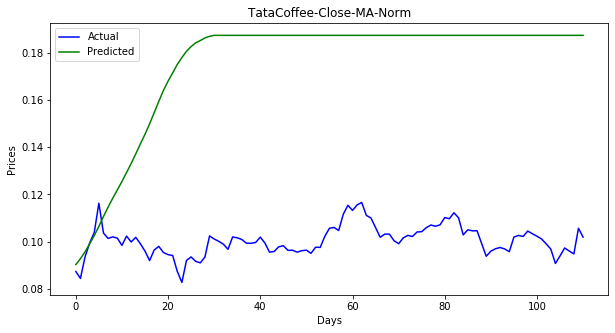

In [40]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [41]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [42]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

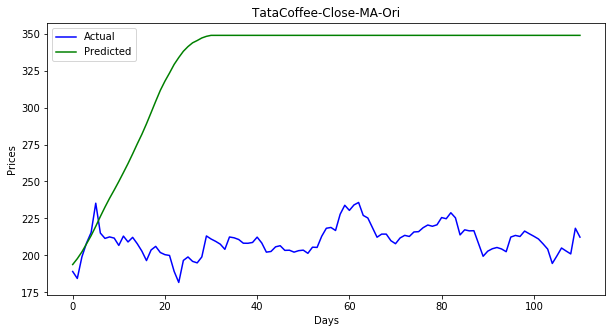

In [43]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

In [44]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 126.39682508640965
maPe-Testset: 0.5729326297280832


In [45]:
forecast=model_fit.predict(len(data1), len(data1))

In [46]:
forecast

array([0.18729634])

In [47]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [48]:
forecast_stock_price_test_oriF

,Closefore
0,348.849391


In [49]:
forecast_stock_price_test_oriF.to_csv("MA.csv",index=False)